# Matching and finding relavant jobs for a Resume

# Sprint  2

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## After adding location column(s) for better similarity 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

import re
import datetime
from datetime import date
from time import strptime

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# reading my sorted resume csv
resume = pd.read_csv('wip/resume_sorted4.csv')

In [3]:
# reading my sorted job csv
job = pd.read_csv('wip/sorted_jobs_master.csv')

In [4]:
# resume features to be matched with jobs
r_df = resume[['resume_id','experience_range','is_grad','is_postgrad','is_doc','location']]
#r_df.head()

In [81]:
#My recommender system to find best jobs for a given resume
def jobs_recommender(r) :
    
    #job features need to be matched with resume
    job_m = related_jobs[['j_id','experience_range','is_grad','is_postgrad','is_doc','location']]
    
    #Store the results in this DF
    matched_jobs = pd.DataFrame(columns = ["id","company","job_title","jobdescription","experience_range","location","similarity"] )
    
    r= r.to_numpy()
    r= r.reshape(1, -1)
    #Go through ALL the related jobs
    for jd in job_m['j_id'] :
        #print(f'jd is {jd}')        
        #Find the similarity of the jobs with resume
        jobs = job_m.loc[jd]
        jobs = jobs.to_numpy()
        jobs = jobs.reshape(1, -1)
        #print(f'job is {jobs}')
        #print(f'r is {r}')
        #print(f'job is {job}')
        similarity = cosine_similarity(r,jobs)
        #print(f'similarity is {similarity}')
        matched_jobs.loc[len(matched_jobs)] = [jd,
                                               related_jobs['company'][jd],
                                               related_jobs['jobtitle'][jd],
                                               related_jobs['jobdescription'][jd],
                                               related_jobs['experience_range'][jd],
                                               related_jobs['location'][jd],
                                               similarity[0][0]]
        

    return matched_jobs.sort_values(by=['similarity'],ascending=False)[1:]

********************************************************************************************
## Trying some examples to see how matching works

For sure, its not the best model, as I am still using 5 custom features created during EDA (4 from 1st sprint and location additional) 
'experience_range','is_grad','is_postgrad','is_doc'   +    location


There is no text modelling involved yet. matching is only on bases of numeric columns.
*********************************************************************************************

### Example 1.  - matching and recommending jobs for a sql dba

In [6]:
#picking a random resume from resume dataset
resume.loc[resume['Resume_title'].str.contains("sql dba")]

,index,Resume_title,City,location,Description,work_experiences,Educations,Skills,Links,Certificates,...,Computer_Eng,Finance,HR,AI_stats,MBA,Other_specialization,resume_id,total_experience,experience_range,loc_name
2405,2405,ms certified sql dba with more than 17 years o...,Chennai,30,ms certified sql dba with more than 17 years o...,"{0: [{'wtitle:': 'PMI - Production, Dev and QA...",{0: [{'e_title:': 'Diploma in Mechanical Engin...,"['ms sql server', ' ms sql server 2005', ' sql...",[],{},...,1,0,0,0,0,0,2405,44,3,tamil nadu


In [75]:
# r1 contrains the only features to be matched of slected resume 13769-java, 2405 - sql dba , 9934 -php
# make yor selection and input resume id here
r1= r_df.loc[10303]
r1

resume_id           10303
experience_range        1
is_grad                 1
is_postgrad             1
is_doc                  0
location               16
Name: 10303, dtype: int64

In [76]:
#from pool of 22,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobtitle'].str.contains("python")]

In [77]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)

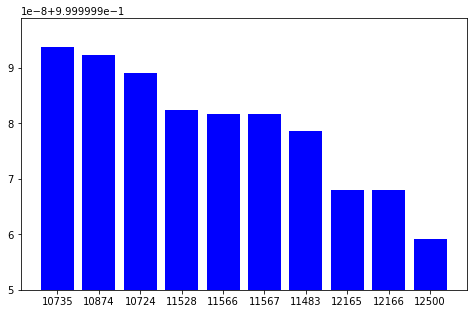

,id,company,job_title,jobdescription,experience_range,location,similarity
16,10735,Globussoft Technologies Pvt. Ltd.,python developer,Job Description Send me Jobs like this Banga...,1,16,1.0
18,10874,Soliton Technologies Pvt Ltd,senior software engineer python,Job Description Send me Jobs like this Job D...,1,16,1.0
14,10724,HACKEREARTH INC,software engineer (python & django),Job Description Send me Jobs like this Take ...,0,16,1.0
20,11528,ALTEN Calsoft Labs.,python developer,Job Description Send me Jobs like this Job D...,1,16,1.0
22,11566,ANZU TECHNOLOGIES PRIVATE LIMITED,"python, pyramid, django and web 2py",Job Description Send me Jobs like this Compa...,1,16,1.0
23,11567,ANZU TECHNOLOGIES PRIVATE LIMITED,"python, pyramid, django and web 2py",Job Description Send me Jobs like this Compa...,1,16,1.0
19,11483,Taurus Hard Soft Solutions Pvt. Ltd.,python coding specialist,Job Description Send me Jobs like this Compa...,0,16,1.0
24,12165,Bangalore Software Services Pvt Ltd.,python automation framework development,Job Description Send me Jobs like this Solid...,1,16,1.0
25,12166,Bangalore Software Services Pvt Ltd.,python automation framework development,Job Description Send me Jobs like this Solid...,1,16,1.0
27,12500,ANZU TECHNOLOGIES PRIVATE LIMITED,c++ and python,Job Description Send me Jobs like this Compa...,1,16,1.0


In [80]:
# Plotting graph to visualize 10 best jobs
x=matched_jobs['id']
y=matched_jobs['similarity']
#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]


#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='blue') # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.99999995,.999999999])
plt.xticks(x_pos, x)
plt.show()
matched_jobs

### Example 2.  - matching and recommending jobs for a java

In [99]:
r1= r_df.loc[13769]
r1

resume_id           13769
experience_range        1
is_grad                 1
is_postgrad             0
is_doc                  0
location               16
Name: 13769, dtype: int64

In [96]:
#from pool of 22,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobtitle'].str.contains("java")]

In [97]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)

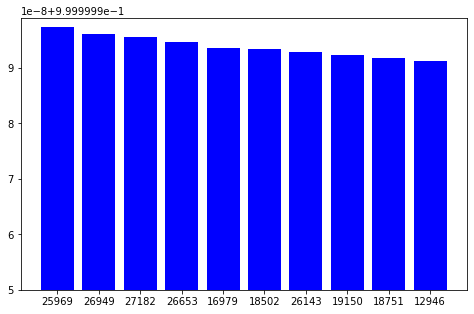

,id,company,job_title,jobdescription,experience_range,location,similarity
772,25969,CBSI India Pvt. Ltd.,java developer with spring and hibernate: 4-8 ...,Job Description Send me Jobs like this Java ...,1,30,1.0
830,26949,BlueRose Technologies Pvt Ltd,excellent job opportunity for java lead with 5...,Job Description Send me Jobs like this Blue ...,1,30,1.0
837,27182,Midasis Technologies Pvt. Ltd.,java developer _ chennai,Job Description Send me Jobs like this Exp: ...,1,30,1.0
812,26653,Out of Box,".net developer, java developer",Job Description Send me Jobs like this Requi...,0,30,1.0
468,16979,Anlage Infotech (I) Pvt. Ltd.,urgent openings for java professionals- indore...,Job Description Send me Jobs like this Dear ...,0,20,1.0
521,18502,Anlage Infotech (I) Pvt. Ltd. hiring for Busin...,senior / lead programmer - core java,Job Description Send me Jobs like this Job D...,1,20,1.0
784,26143,Careernet Technologies Pvt Ltd,"technical architect,java architect, mobility a...",Job Description Send me Jobs like this Job D...,2,33,1.0
546,19150,Planman HR Pvt. Ltd.,sr technical consultant - java architect - htm...,Job Description Send me Jobs like this - 9+ ...,2,20,1.0
536,18751,Tata Consultancy Services Ltd.,java architect,Job Description Send me Jobs like this Job D...,2,20,1.0
390,12946,SMG,angular java script engineer,Job Description Send me Jobs like this Job: ...,1,16,1.0


In [98]:
# Plotting graph to visualize 10 best jobs
x=matched_jobs['id']
y=matched_jobs['similarity']
#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]


#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='blue') # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.99999995,.999999999])
plt.xticks(x_pos, x)
plt.show()
matched_jobs

In [82]:
r1= r_df.loc[1]
r1

resume_id            1
experience_range     0
is_grad              1
is_postgrad          1
is_doc               0
location            16
Name: 1, dtype: int64

In [91]:
related_jobs = job #.loc[job['jobtitle'].str.contains("developer")]

In [92]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)

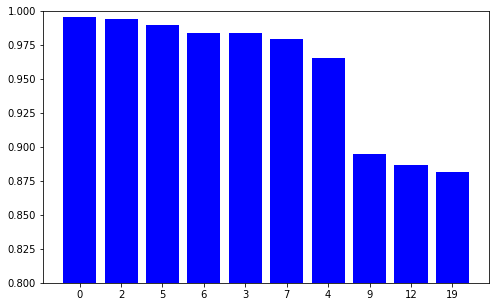

,id,company,job_title,jobdescription,experience_range,location,similarity
0,0,MM Media Pvt Ltd,walkin data entry operator (night shift),Job Description Send me Jobs like this Quali...,0,30,0.995710
2,2,Softtech Career Infosystem Pvt. Ltd,pl/sql developer - sql,Job Description Send me Jobs like this - as ...,1,16,0.994258
5,5,Onboard HRServices LLP,manager/ad/partner - indirect tax - ca,Job Description Send me Jobs like this - Inv...,3,33,0.989711
6,6,Onboard HRServices LLP,manager/ad/partner - indirect tax - ca,Job Description Send me Jobs like this - Inv...,3,30,0.983860
3,3,Onboard HRServices LLP,manager/ad/partner - indirect tax - ca,Job Description Send me Jobs like this - Inv...,3,20,0.983531
7,7,Onboard HRServices LLP,manager/ad/partner - indirect tax - ca,Job Description Send me Jobs like this - Inv...,3,30,0.979176
4,4,Onboard HRServices LLP,manager/ad/partner - indirect tax - ca,Job Description Send me Jobs like this - Inv...,3,16,0.965753
9,9,Spire Technologies and Solutions Pvt. Ltd.,java technical lead (6-8 yrs) -,Job Description Send me Jobs like this Pleas...,2,16,0.894504
12,12,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,20,0.886331
19,19,Kinesis Management Consultant Pvt. Ltd,php developer,Job Description Send me Jobs like this exper...,0,31,0.881495


In [94]:
# Plotting graph to visualize 10 best jobs
x=matched_jobs['id']
y=matched_jobs['similarity']
#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]


#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='blue') # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.8,1])
plt.xticks(x_pos, x)
plt.show()
matched_jobs